In [256]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
import numpy as np
import seaborn as sns

In [258]:
df=pd.read_csv('listings.csv')

/Users/chenyichang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [202]:
# df=df.drop('listing_url',axis=1)
# df=df.drop('scrape_id',axis=1)
# df=df.drop('last_scraped',axis=1)
# df=df.drop('summary',axis=1)
# df=df.drop('description',axis=1)
# df=df.drop('experiences_offered',axis=1)
# df=df.drop('neighborhood_overview',axis=1)
# df=df.drop('notes',axis=1)
# df=df.drop('transit',axis=1)
# df=df.drop('access',axis=1)
# df=df.drop('interaction',axis=1)
# df=df.drop('house_rules',axis=1)
# df=df.drop('thumbnail_url',axis=1)
# df=df.drop('medium_url',axis=1)
# df=df.drop('picture_url',axis=1)
# df=df.drop('xl_picture_url',axis=1)

In [203]:
# df=df.drop('host_name',axis=1)
# df=df.drop('host_url',axis=1)
# df=df.drop('host_about',axis=1)
# df=df.drop('host_response_time',axis=1)
# df=df.drop('host_response_rate',axis=1)
# df=df.drop('host_acceptance_rate',axis=1)
# df=df.drop('host_thumbnail_url',axis=1)
# df=df.drop('host_picture_url',axis=1)
# df=df.drop('host_verifications',axis=1)
# df=df.drop('host_has_profile_pic',axis=1)
# df=df.drop('host_identity_verified',axis=1)

In [259]:
df=df[df['neighbourhood_group_cleansed']=='Manhattan']
df=df[['host_is_superhost','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price','cancellation_policy']]

In [260]:
df.head()

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cancellation_policy
1,t,Harlem,Apartment,Private room,3,1.0,1.0,3.0,$59.00,strict_14_with_grace_period
3,f,Midtown,Apartment,Entire home/apt,2,1.0,0.0,1.0,$225.00,strict_14_with_grace_period
7,f,Harlem,Apartment,Private room,2,1.0,1.0,1.0,$150.00,strict_14_with_grace_period
10,f,East Harlem,Apartment,Entire home/apt,1,1.0,NaN,1.0,$80.00,strict_14_with_grace_period
11,f,Hell's Kitchen,Apartment,Private room,1,1.0,1.0,1.0,$52.00,strict_14_with_grace_period


In [116]:
df.describe()

,accommodates,bathrooms,bedrooms,beds
count,23491.000000,23444.000000,23466.000000,23467.000000
mean,2.905921,1.122142,1.118981,1.559594
std,1.793561,0.381447,0.747574,0.988931
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000,2.000000
max,16.000000,6.500000,8.000000,16.000000


In [261]:
df=df.dropna(how='any')

In [262]:
df['price'] = df['price'].str.replace(",", "")
df['price'] = df['price'].str.replace("$", "").astype(float)

# Defining a Function to Calculate the Adjusted  R2 

In [263]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# Simple Regression

In [264]:
df=df[df['price']<2000]

In [276]:
evaluation=pd.DataFrame(columns=["Model","Mean Squared Error","R-squared-training","Adjusted R-squared-training","R-squared-test","Adjusted R-squared-test"])

In [266]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lr
from sklearn import metrics

In [277]:
train_data,test_data = train_test_split(df,train_size = 0.7,random_state=0)

lr = lr.LinearRegression()
X_train = np.array(train_data['bedrooms'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['bedrooms'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrsm = format(lr.score(X_train, y_train),'.3f')
rtesm = format(lr.score(X_test, y_test),'.3f')

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Regression',msesm,rtrsm,'-',rtesm,'-']
evaluation

Average Price for Test Data: 184.214
Intercept: 88.28754830116813
Coefficient: [85.99779918]


/Users/chenyichang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,Model,Mean Squared Error,R-squared-training,Adjusted R-squared-training,R-squared-test,Adjusted R-squared-test
0,Simple Regression,145.643,0.169,-,0.179,-


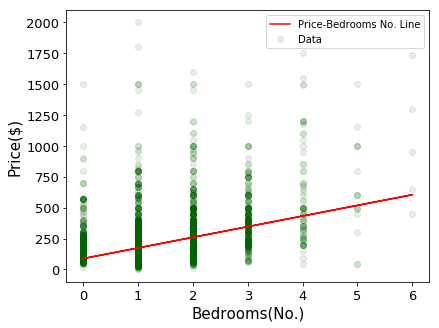

In [268]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Price-Bedrooms No. Line")
plt.xlabel("Bedrooms(No.)", fontsize=15)
plt.ylabel("Price($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

# Multiple regression

<li>Pearson Correlation Matrix</li>
<ul>
<li>If a feature does not improve your model a lot, not adding it may be a better choice. Besides, when it comes to correlation, if there is very high correlation between two features, then keeping both of them is not a good idea most of the time. 

In [214]:
df.head()

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cancellation_policy
1,t,Harlem,Apartment,Private room,3,1.0,1.0,3.0,59.0,strict_14_with_grace_period
3,f,Midtown,Apartment,Entire home/apt,2,1.0,0.0,1.0,225.0,strict_14_with_grace_period
7,f,Harlem,Apartment,Private room,2,1.0,1.0,1.0,150.0,strict_14_with_grace_period
11,f,Hell's Kitchen,Apartment,Private room,1,1.0,1.0,1.0,52.0,strict_14_with_grace_period
13,t,East Village,Apartment,Private room,2,1.0,1.0,1.0,80.0,strict_14_with_grace_period


In [269]:
df['host_is_superhost']=np.where(df['host_is_superhost']=='t',1,0)

#Set dummy variables of property type. The remaining type includes hotel, Resort and so on...(<10%)
df['if Apartment']=np.where(df['property_type']=='Apartment',1,0)
df['if House']=np.where(df['property_type']=='House',1,0)
df['if Loft']=np.where(df['property_type']=='Loft',1,0)

#Set dummy variables of room type. The remaining room type is shared room.
df['if Private room']=np.where(df['room_type']=='Private room',1,0)
df['if Entire home/apt']=np.where(df['room_type']=='Entire home/apt',1,0) 

# Set numerical variable for cancellation_policy accoring to cancellation flexibility
def cancellation_score(x):
    if x=='strict':
        return 0
    elif x=='super_strict_60':
        return 1
    elif x=='super_strict_30':
        return 2
    elif x=='strict_14_with_grace_period':
        return 3
    elif x=='moderate':
        return 4
    elif x=='flexible':
        return 5
df['cancellation_score']=df['cancellation_policy'].apply(lambda x:cancellation_score(x))

# Combine neighbors into 7 major districts
def district(neigh):
    if neigh in {'Harlem','East Harlem','Inwood','Washington Heights','Morningside Heights','Marble Hill'}:
        return 'Upper Manhattan'
    elif neigh in {'Upper West Side'}:
        return 'Upper West Manhattan'
    elif neigh in {'Upper East Side','Roosevelt Island'}:
        return 'Upper East Manhattan'
    elif neigh in {"Hell's Kitchen",'Chelsea','Theater District'}:
        return 'Mid West Manhattan'
    elif neigh in {'Midtown','Flatiron District'}:
        return 'Mid Manhattan'
    elif neigh in {'Murray Hill','Kips Bay','Gramercy','Stuyvesant Town'}:
        return 'Mid East Manhattan'
    else:
        return 'Lower Manhattan'

df['district']=df['neighbourhood_cleansed'].apply(lambda x:district(x))
# Set dummy variables for districts.
df['if Upper Manhattan']=np.where(df['district']=='Upper Manhattan',1,0)
df['if Upper East Manhattan']=np.where(df['district']=='Upper East Manhattan',1,0)
df['if Mid West Manhattan']=np.where(df['district']=='Mid West Manhattan',1,0)
df['if Mid Manhattan']=np.where(df['district']=='Mid Manhattan',1,0)
df['if Mid East Manhattan']=np.where(df['district']=='Mid East Manhattan',1,0)
df['if Lower Manhattan']=np.where(df['district']=='Lower Manhattan',1,0)

In [16]:
df.head()

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cancellation_policy,...,if Private room,if Entire home/apt,cancellation_score,district,if Upper Manhattan,if Upper East Manhattan,if Mid West Manhattan,if Mid Manhattan,if Mid East Manhattan,if Lower Manhattan
1,1,Harlem,Apartment,Private room,3,1.0,1.0,3.0,59.0,strict_14_with_grace_period,...,1,0,3,Upper Manhattan,1,0,0,0,0,0
3,0,Midtown,Apartment,Entire home/apt,2,1.0,0.0,1.0,225.0,strict_14_with_grace_period,...,0,1,3,Mid Manhattan,0,0,0,1,0,0
7,0,Harlem,Apartment,Private room,2,1.0,1.0,1.0,150.0,strict_14_with_grace_period,...,1,0,3,Upper Manhattan,1,0,0,0,0,0
11,0,Hell's Kitchen,Apartment,Private room,1,1.0,1.0,1.0,52.0,strict_14_with_grace_period,...,1,0,3,Mid West Manhattan,0,0,1,0,0,0
13,1,East Village,Apartment,Private room,2,1.0,1.0,1.0,80.0,strict_14_with_grace_period,...,1,0,3,Lower Manhattan,0,0,0,0,0,1


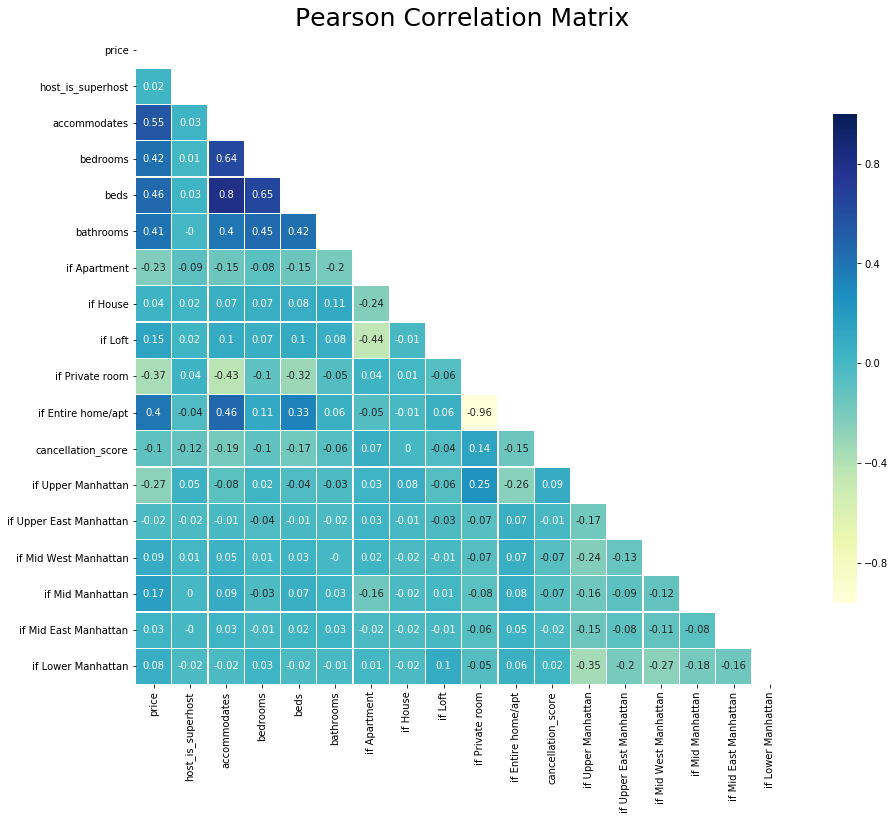

In [270]:
features = ['price',
'host_is_superhost',
'accommodates',
'bedrooms',
'beds',
'bathrooms',
'if Apartment',
'if House',
'if Loft',
'if Private room',
'if Entire home/apt',
'cancellation_score',
'if Upper Manhattan',
'if Upper East Manhattan',
'if Mid West Manhattan',
'if Mid Manhattan',
'if Mid East Manhattan',
'if Lower Manhattan']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr().round(2),linewidths=0.25,vmax=1.0,square=True,cmap="YlGnBu", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75})

# Complex Model

<li>boxplot

[Text(0,0.5,'Price'), Text(0.5,0,'Accommodates')]

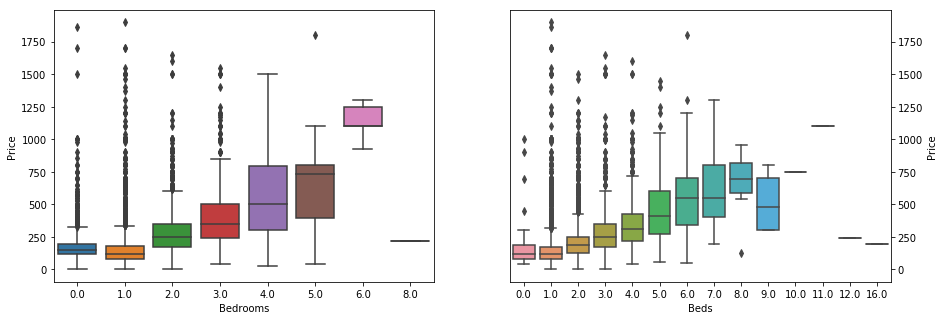

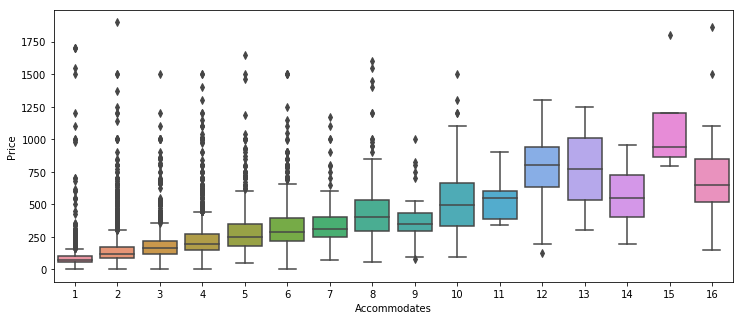

In [271]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'], ax=axes[0])
sns.boxplot(x=train_data['beds'],y=train_data['price'], ax=axes[1])
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Beds', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=train_data['accommodates'],y=train_data['price'], ax=axe)
axe.set(xlabel='Accommodates', ylabel='Price')

In [272]:
from mpl_toolkits.mplot3d import Axes3D

[Text(0.5,0,'\nAccommodates'), Text(0.5,0,'\nBeds'), Text(0.5,0,'\nBedrooms')]

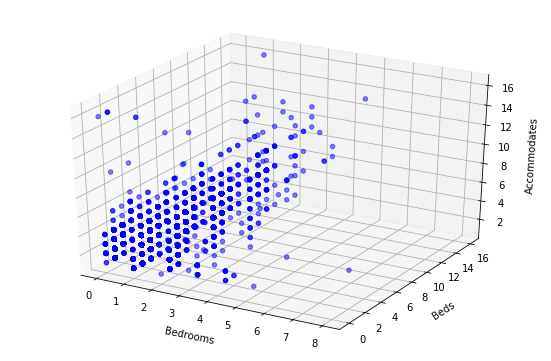

In [273]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train_data['bedrooms'],train_data['beds'],train_data['accommodates'],c="blue",alpha=.5)
ax.set(xlabel='\nBedrooms',ylabel='\nBeds',zlabel='\nAccommodates')

<li>delete beds

In [278]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lr
from sklearn import metrics

train_data,test_data = train_test_split(df,train_size = 0.7,random_state=0)
features1 = [
'host_is_superhost',
'accommodates',
'bedrooms',
'bathrooms',
'if Apartment',
'if House',
'if Loft',
'if Private room',
'if Entire home/apt',
'cancellation_score',
'if Upper Manhattan',
'if Upper East Manhattan',
'if Mid West Manhattan',
'if Mid Manhattan',
'if Mid East Manhattan',
'if Lower Manhattan']

x_train = train_data[features1]
y_train = train_data['price']
x_test = test_data[features1]
y_test = test_data['price']

complex_model_1 = lr.LinearRegression()
complex_model_1.fit(x_train,y_train)

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred1 = complex_model_1.predict(x_test)
msecm1 = format(np.sqrt(metrics.mean_squared_error(y_test,pred1)),'.3f')
rtrcm1 = format(complex_model_1.score(x_train,y_train),'.3f')
artrcm1 = format(adjustedR2(complex_model_1.score(x_train,y_train),train_data.shape[0],len(features1)),'.3f')
rtecm1 = format(complex_model_1.score(x_test,y_test),'.3f')
artecm1 = format(adjustedR2(complex_model_1.score(x_test,y_test),test_data.shape[0],len(features1)),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Complex Model',msecm1,rtrcm1,artrcm1,rtecm1,artecm1 ]
evaluation

Intercept: -44.74525299505541
Coefficients: [  6.76036992  21.72878604  29.83455498  83.68192204 -52.38883923
 -43.02666755  34.09563484  19.19921611  82.80093744   5.95285694
 -47.60977126  -2.61460376  31.75819933  64.25665971  11.25294554
  17.16482652]


/Users/chenyichang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,Model,Mean Squared Error,R-squared-training,Adjusted R-squared-training,R-squared-test,Adjusted R-squared-test
0,Simple Regression,145.643,0.169,-,0.179,-
1,Complex Model,118.586,0.446,0.446,0.456,0.455


In [279]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
regressor_OLS = sm.OLS(y_train, x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     822.9
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:33:59   Log-Likelihood:            -1.0061e+05
No. Observations:               16342   AIC:                         2.013e+05
Df Residuals:                   16325   BIC:                         2.014e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -44.7453      9.214     -4.856      0.000     -62.806     -26.685
host_is_superhost           6.7604      2.612      2.588      0.010       1.641      11.880
accommodates               21.7288      0.796     27.306      0.000      20.169      23.289
bedrooms                   29.8346      1.701     17.537      0.000      26.500      33.169
bathrooms                  83.6819      2.804     29.841      0.000      78.185      89.179
if Apartment              -52.3888      3.481    -15.051      0.000     -59.211     -45.566
if House                  -43.0267     11.230     -3.831      0.000     -65.039     -21.014
if Loft                    34.0956      6.882      4.954      0.000      20.606      47.585
if Private room            19.1992      6.391      3.004      0.003       6.672      31.727
if Entire home/apt         82.8009      6.459     12.820      0.000      70.141      95.460
cancellation_score          5.9529      1.036      5.746      0.000       3.922       7.984
if Upper Manhattan        -47.6098      3.485    -13.660      0.000     -54.441     -40.778
if Upper East Manhattan    -2.6146      4.201     -0.622      0.534     -10.849       5.620
if Mid West Manhattan      31.7582      3.708      8.565      0.000      24.490      39.026
if Mid Manhattan           64.2567      4.378     14.679      0.000      55.676      72.837
if Mid East Manhattan      11.2529      4.609      2.441      0.015       2.218      20.288
if Lower Manhattan         17.1648      3.374      5.087      0.000      10.551      23.779
==============================================================================
Omnibus:                    15239.207   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1029960.386
Skew:                           4.339   Prob(JB):                         0.00
Kurtosis:                      40.912   Cond. No.                         73.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression

In [ ]:
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.fit_transform(test_data[features2])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly1 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly1 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
rtepoly1 = format(poly.score(X_testpoly,test_data['price']),'.3f')

polyfeat = PolynomialFeatures(degree=3)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.fit_transform(test_data[features2])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly2 = format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f')
rtrpoly2 = format(poly.score(X_trainpoly,train_data['price']),'.3f')
rtepoly2 = format(poly.score(X_testpoly,test_data['price']),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression','degree=2',msepoly1,rtrpoly1,'-',rtepoly1,'-']
evaluation.loc[r+1] = ['Polynomial Regression','degree=3',msepoly2,rtrpoly2,'-',rtepoly2,'-']
evaluation.sort_values(by = 'R-squared (test)', ascending=False)